## **EDA and Machine Learning-Based Customer Churn Analysis for SkyWave Telecom**



## Project summary

This project presents a comprehensive Exploratory Data Analysis (EDA) and machine learning-based predictive modeling approach to analyze and forecast customer churn for SkyWave Telecom. The goal is to uncover key insights into customer behavior and identify the primary factors contributing to service discontinuation.

The workflow begins with EDA, which involves data cleaning, visualization, and statistical exploration to understand customer demographics, service usage patterns, and account characteristics. This stage provides valuable insights into trends, correlations, and potential churn indicators.

Following EDA, the project applies supervised machine learning techniques to build predictive models capable of classifying customers based on their likelihood to churn. Three popular classification algorithms—Decision Tree, Random Forest, and XGBoost—are implemented, trained, and evaluated to determine the most effective model for churn prediction.

The dataset used in this analysis was obtained from Kaggle, containing detailed information about customer profiles, service subscriptions, and account activity. The findings and predictive insights from this project can help telecom providers like SkyWave Telecom enhance customer retention strategies through data-driven decision-making.

Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

Loading the dataset from CSV file.

In [3]:
df = pd.read_csv("/content/CustomerChurn.csv")

# Initial inspection of the data and cleaning

---



In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [8]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
# Drop the unncessary column "customerID"
df = df.drop(columns=['customerID'])

# Rename columns to more professional format
df = df.rename(columns={
    'gender': 'Gender',
    'SeniorCitizen': 'Senior_Citizen',
    'tenure': 'Tenure',
    'PhoneService': 'Phone_Service',
    'MultipleLines': 'Multiple_Lines',
    'InternetService': 'Internet_Service',
    'OnlineSecurity': 'Online_Security',
    'OnlineBackup': 'Online_Backup',
    'DeviceProtection': 'Device_Protection',
    'TechSupport': 'Tech_Support',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Movies',
    'PaperlessBilling': 'Paperless_Billing',
    'PaymentMethod': 'Payment_Method',
    'MonthlyCharges': 'Monthly_Charges',
    'TotalCharges': 'Total_Charges',
    'Churn': 'Churn'
})

# Check the updated columns
print(df.columns.values)


['Gender' 'Senior_Citizen' 'Partner' 'Dependents' 'Tenure' 'Phone_Service'
 'Multiple_Lines' 'Internet_Service' 'Online_Security' 'Online_Backup'
 'Device_Protection' 'Tech_Support' 'Streaming_TV' 'Streaming_Movies'
 'Contract' 'Paperless_Billing' 'Payment_Method' 'Monthly_Charges'
 'Total_Charges' 'Churn']


In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior_Citizen     7043 non-null   int64  
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure             7043 non-null   int64  
 5   Phone_Service      7043 non-null   object 
 6   Multiple_Lines     7043 non-null   object 
 7   Internet_Service   7043 non-null   object 
 8   Online_Security    7043 non-null   object 
 9   Online_Backup      7043 non-null   object 
 10  Device_Protection  7043 non-null   object 
 11  Tech_Support       7043 non-null   object 
 12  Streaming_TV       7043 non-null   object 
 13  Streaming_Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless_Billing  7043 non-null   object 
 16  Payment_Method     7043 

In [12]:
## Check for missing values & duplicates

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
df = df.drop_duplicates()

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Number of duplicate rows: 22

Missing values per column:
Gender                0
Senior_Citizen        0
Partner               0
Dependents            0
Tenure                0
Phone_Service         0
Multiple_Lines        0
Internet_Service      0
Online_Security       0
Online_Backup         0
Device_Protection     0
Tech_Support          0
Streaming_TV          0
Streaming_Movies      0
Contract              0
Paperless_Billing     0
Payment_Method        0
Monthly_Charges       0
Total_Charges        11
Churn                 0
dtype: int64


In [13]:
# Drop rows where Total_Charges is missing
df = df.dropna(subset=['Total_Charges'])

# Verify that missing values are removed
print(df['Total_Charges'].isnull().sum())

0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7010 non-null   object 
 1   Senior_Citizen     7010 non-null   int64  
 2   Partner            7010 non-null   object 
 3   Dependents         7010 non-null   object 
 4   Tenure             7010 non-null   int64  
 5   Phone_Service      7010 non-null   object 
 6   Multiple_Lines     7010 non-null   object 
 7   Internet_Service   7010 non-null   object 
 8   Online_Security    7010 non-null   object 
 9   Online_Backup      7010 non-null   object 
 10  Device_Protection  7010 non-null   object 
 11  Tech_Support       7010 non-null   object 
 12  Streaming_TV       7010 non-null   object 
 13  Streaming_Movies   7010 non-null   object 
 14  Contract           7010 non-null   object 
 15  Paperless_Billing  7010 non-null   object 
 16  Payment_Method     7010 non-n

# Summary statistics

In [15]:
df.describe()

,Senior_Citizen,Tenure,Monthly_Charges,Total_Charges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


# Insights:

Senior_Citizen: Only ~16% of customers are seniors; most are non-senior.

Tenure: Average ~32 months, with wide variation; new customers may be more likely to churn.

Monthly_Charges: Mean ~$65, wide range from low- to high-tier plans.

Total_Charges: Highly skewed ($18–$8,685); long-term/high-paying customers are key for revenu

# Expolratory analysis

# Univariate analysis for categorical data and the target variable

In [16]:
# ctreate bins for the Tenure
df1= df.copy()
df1.Tenure.max()

72

In [17]:
df1.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
labels = ["{0}-{1}".format(i,i+11)for i in range (1,72,12)]
df1['Tenure_Group'] = pd.cut(df1['Tenure'], range(1,80,12), labels=labels, right=False, include_lowest=True)
df1.Tenure_Group.value_counts()


,count
Tenure_Group,
1-12,2153
61-72,1407
13-24,1024
25-36,832
49-60,832
37-48,762


In [19]:
# Replace 1 and 0 with 'Yes' and 'No'for the Senior_Citizen
df1['Senior_Citizen'] = df1['Senior_Citizen'].replace({1: 'Yes', 0: 'No'})


In [20]:
df1.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Tenure_Group
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12



=== Categorical Features Value Counts ===

Gender value counts:
 Gender
Male      3535
Female    3475
Name: count, dtype: int64

Senior_Citizen value counts:
 Senior_Citizen
No     5869
Yes    1141
Name: count, dtype: int64

Partner value counts:
 Partner
No     3617
Yes    3393
Name: count, dtype: int64

Dependents value counts:
 Dependents
No     4911
Yes    2099
Name: count, dtype: int64

Phone_Service value counts:
 Phone_Service
Yes    6330
No      680
Name: count, dtype: int64

Internet_Service value counts:
 Internet_Service
Fiber optic    3090
DSL            2414
No             1506
Name: count, dtype: int64

Contract value counts:
 Contract
Month-to-month    3853
Two year          1685
One year          1472
Name: count, dtype: int64

Paperless_Billing value counts:
 Paperless_Billing
Yes    4158
No     2852
Name: count, dtype: int64

Payment_Method value counts:
 Payment_Method
Electronic check             2359
Mailed check                 1588
Bank transfer (automatic)    1

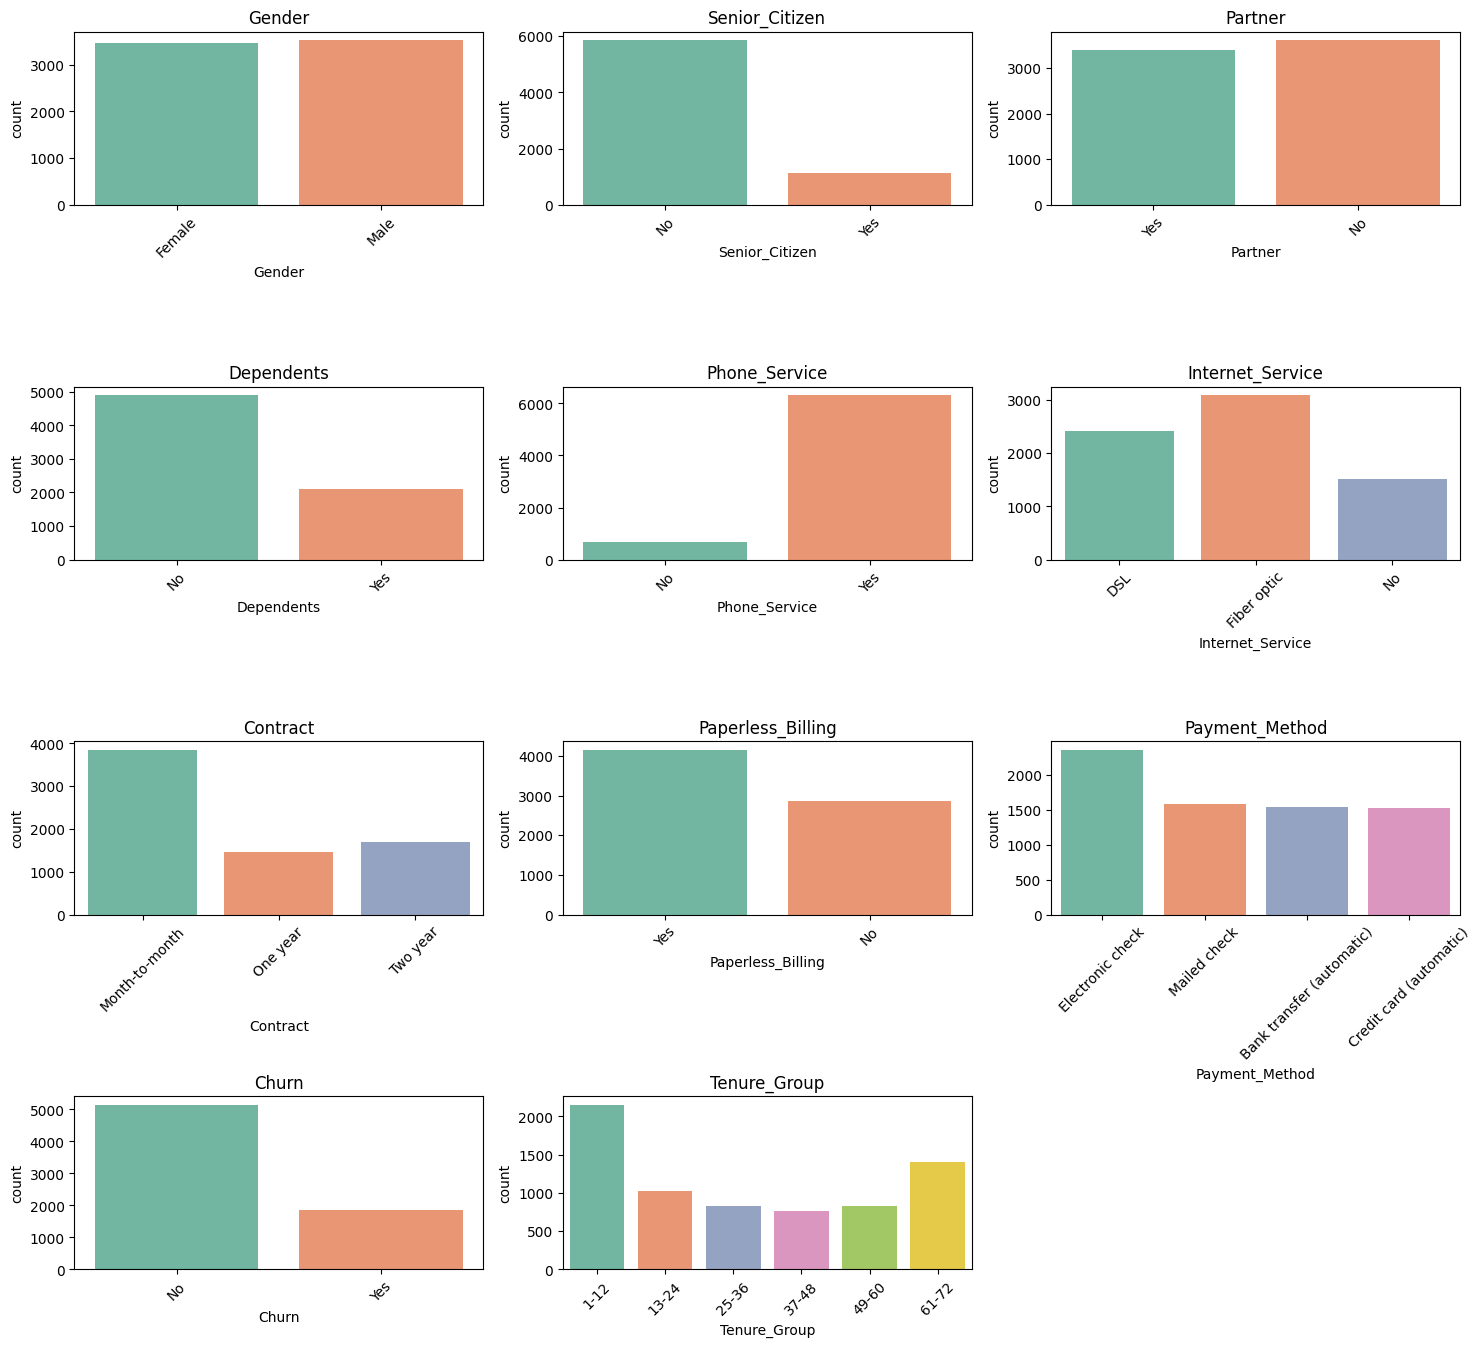

In [21]:
# Categorical columns
categorical_cols = ['Gender','Senior_Citizen','Partner','Dependents','Phone_Service',
                    'Internet_Service','Contract',
                    'Paperless_Billing','Payment_Method','Churn', 'Tenure_Group']
print("\n=== Categorical Features Value Counts ===")
for col in categorical_cols:
    print(f"\n{col} value counts:\n", df1[col].value_counts())

# Plot without palette to avoid warnings
plt.figure(figsize=(15,20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6,3,i)
    sns.countplot(data=df1, x=col, hue=col, palette='Set2') # Use 'color' instead of 'palette'
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

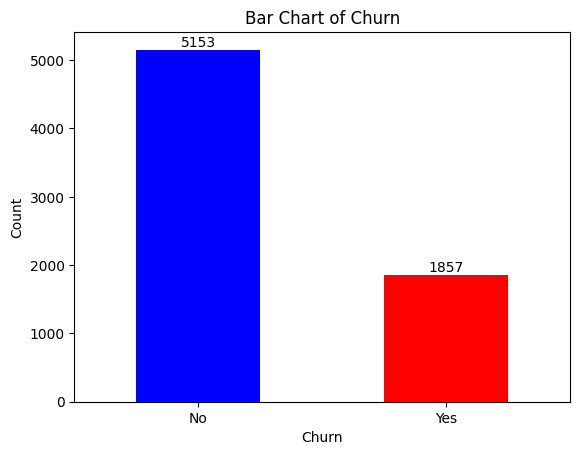

In [22]:
# Count the number of occurrences of each category in 'Churn'
churn_counts = df['Churn'].value_counts()

# Plot a bar chart
ax = churn_counts.plot(kind='bar', color=['blue', 'red'])

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Bar Chart of Churn')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Add value labels on top of each bar
for i, count in enumerate(churn_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.show()


# Insights from the categorical features

Gender: The customer base is evenly distributed between male and female clients.

Senior Citizens: Approximately 16% of the customers are senior citizens.

Partner and Dependents: A slight majority (52%) of customers do not have a partner, and around 70% do not have dependents.

Phone Service: The vast majority (90%) of customers have an active phone service.

Internet Service: Fiber optic is the most subscribed service type (44%), followed by DSL (34%), while 22% of customers do not use any internet service.

Contract Type: Over half (55%) of the customers are on month-to-month contracts, which typically indicates a lower level of customer commitment.

Paperless Billing: A majority (59%) of customers prefer paperless billing.

Payment Method: Electronic check is the most commonly used payment method (34%), followed by mailed checks and automatic payments.

Churn: Approximately 26% of customers have discontinued their service, highlighting potential issues with customer retention.

Tenure Group: Most customers fall within the 1–12 month tenure group, suggesting a significant proportion of relatively new customers, while long-term subscribers (61–72 months) are fewer in number.

# Univariate analysis for the numerical data

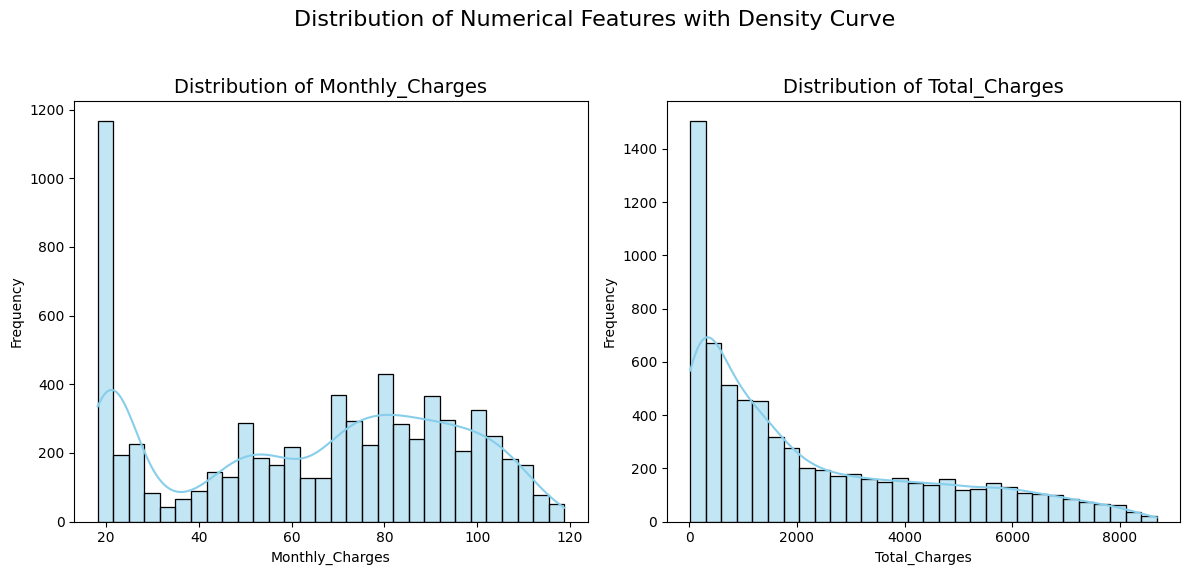

In [23]:
# Numerical Features
numerical_cols = ['Monthly_Charges', 'Total_Charges']

plt.figure(figsize=(12,6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, i)
    sns.histplot(data=df, x=col, bins=30, kde=True, color='skyblue')  # added kde=True
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.suptitle("Distribution of Numerical Features with Density Curve", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



# Bivariate analysis for Categorical features:

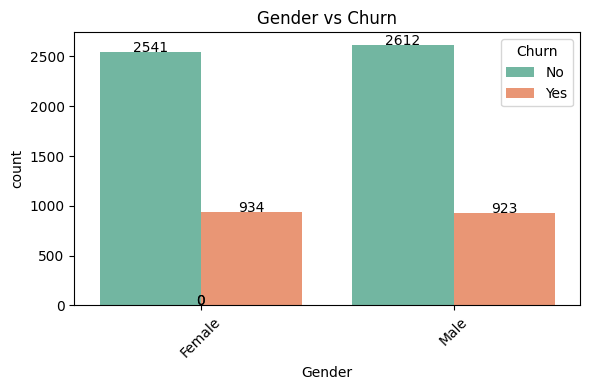


Gender vs Churn value counts:
Churn     No  Yes
Gender           
Female  2541  934
Male    2612  923


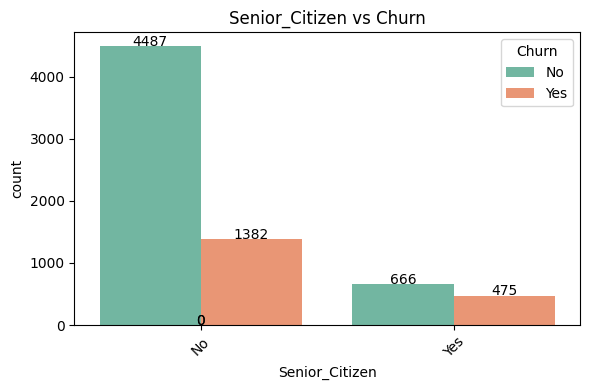


Senior_Citizen vs Churn value counts:
Churn             No   Yes
Senior_Citizen            
No              4487  1382
Yes              666   475


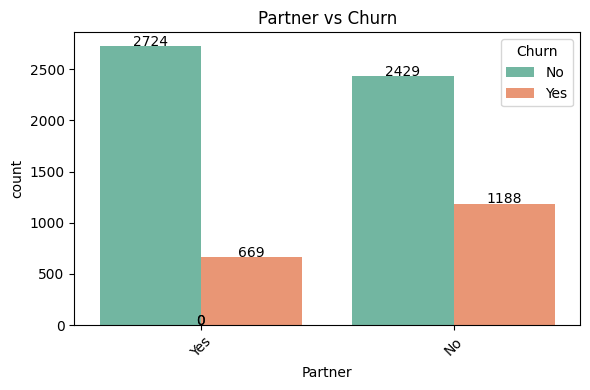


Partner vs Churn value counts:
Churn      No   Yes
Partner            
No       2429  1188
Yes      2724   669


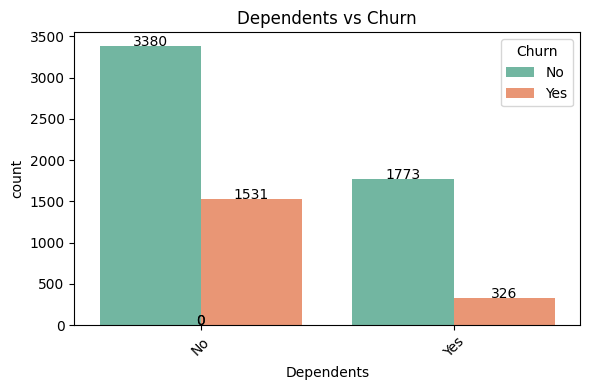


Dependents vs Churn value counts:
Churn         No   Yes
Dependents            
No          3380  1531
Yes         1773   326


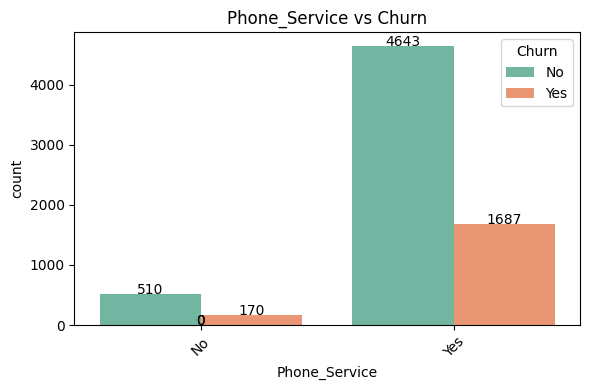


Phone_Service vs Churn value counts:
Churn            No   Yes
Phone_Service            
No              510   170
Yes            4643  1687


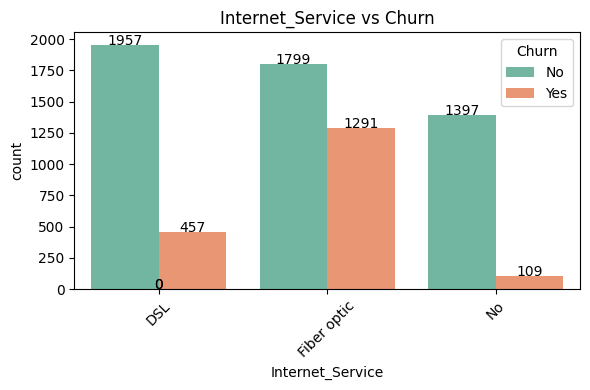


Internet_Service vs Churn value counts:
Churn               No   Yes
Internet_Service            
DSL               1957   457
Fiber optic       1799  1291
No                1397   109


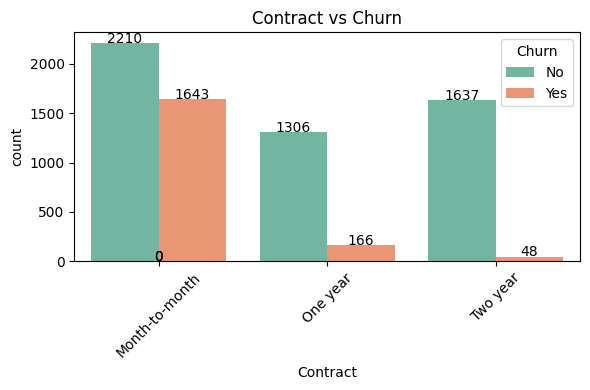


Contract vs Churn value counts:
Churn             No   Yes
Contract                  
Month-to-month  2210  1643
One year        1306   166
Two year        1637    48


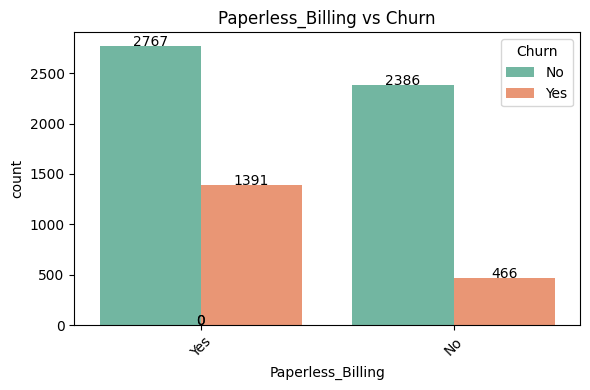


Paperless_Billing vs Churn value counts:
Churn                No   Yes
Paperless_Billing            
No                 2386   466
Yes                2767  1391


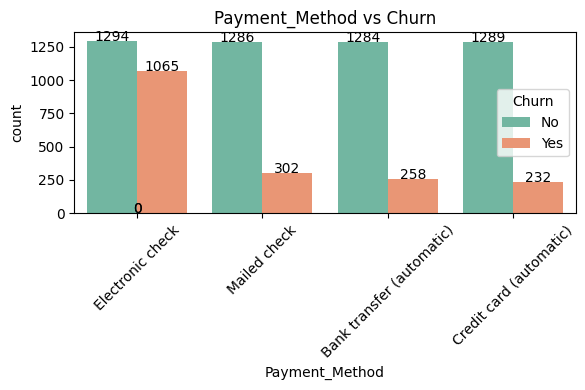


Payment_Method vs Churn value counts:
Churn                        No   Yes
Payment_Method                       
Bank transfer (automatic)  1284   258
Credit card (automatic)    1289   232
Electronic check           1294  1065
Mailed check               1286   302


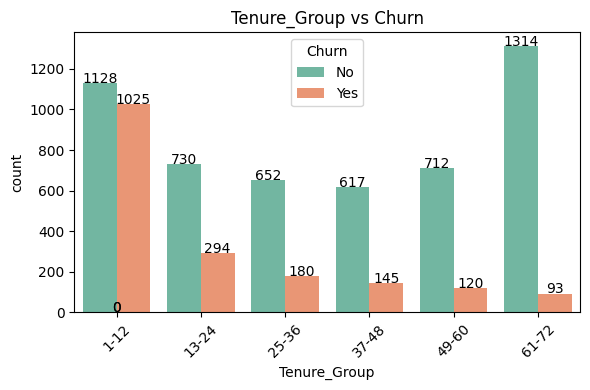


Tenure_Group vs Churn value counts:
Churn           No   Yes
Tenure_Group            
1-12          1128  1025
13-24          730   294
25-36          652   180
37-48          617   145
49-60          712   120
61-72         1314    93


In [24]:
categorical_cols = ['Gender','Senior_Citizen','Partner','Dependents','Phone_Service',
                    'Internet_Service','Contract',
                    'Paperless_Billing','Payment_Method','Tenure_Group']

# Loop through categorical columns and plot

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=col, hue='Churn', data=df1, palette='Set2')

    # Add data labels
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            x=p.get_x() + p.get_width() / 2,  # center of the bar
            y=height + 0.5,                  # slightly above the bar
            s=int(height),                    # the count
            ha='center'
        )

    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


    print(f"\n{col} vs Churn value counts:")
    print(pd.crosstab(df1[col], df1['Churn']))

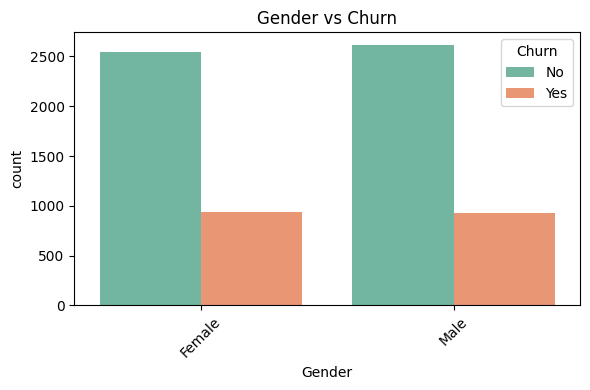

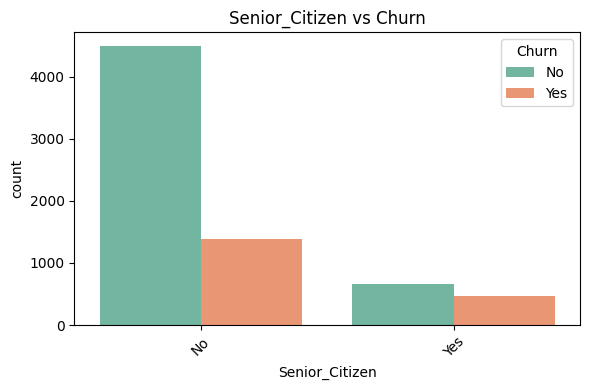

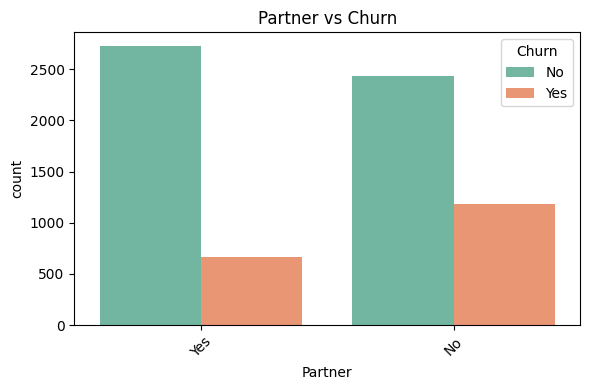

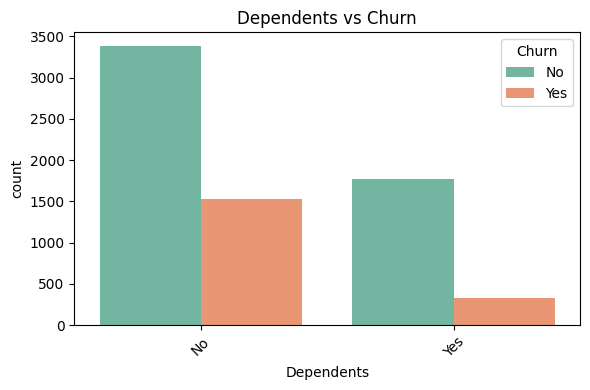

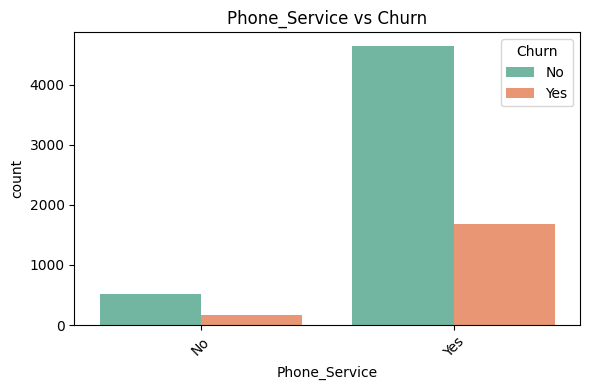

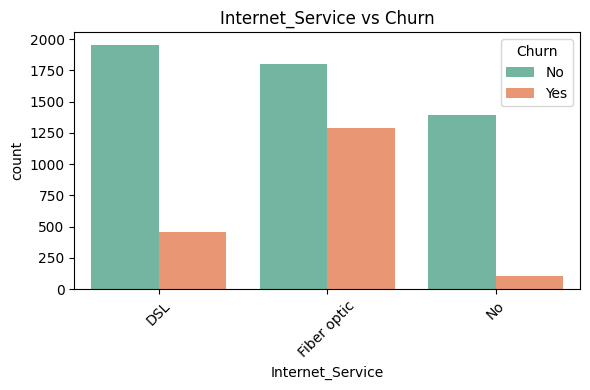

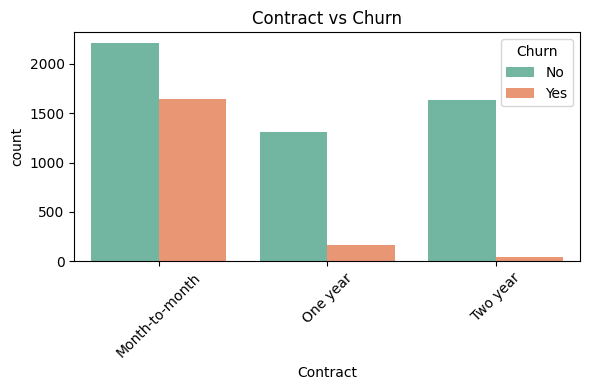

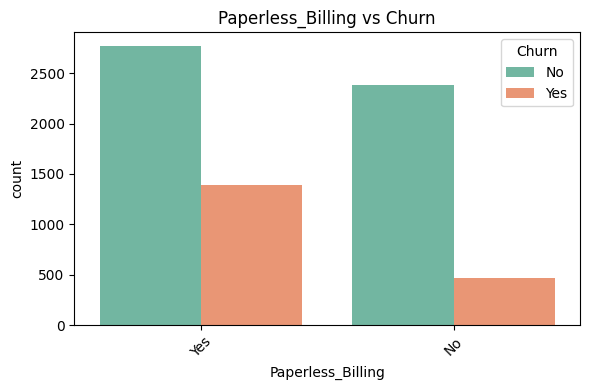

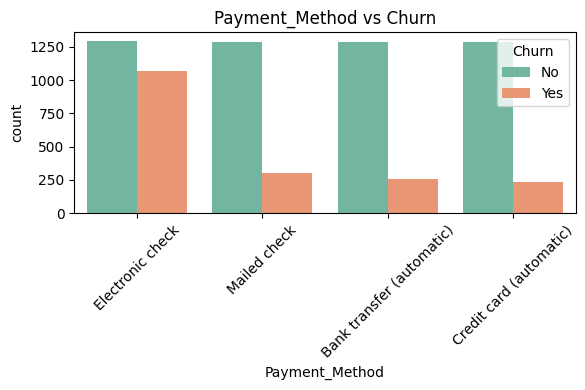

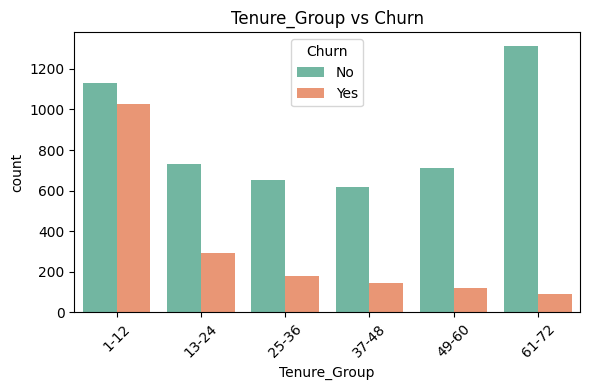

In [ ]:

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Churn', data=df1, palette='Set2')

    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Insights from the Bivariate analysts of the categorical data

Gender: Churn is approximately balanced between male and female customers, suggesting minimal impact of gender on attrition.

Senior Citizens: Senior customers exhibit a higher churn proportion (41%) compared to non-seniors (24%), indicating age may influence retention.

Partner and Dependents: Customers without a partner or dependents are more likely to churn, highlighting potential links between family status and loyalty.

Phone Service: Churn rates are slightly higher among customers with active phone service, though the effect is modest.

Internet Service: Churn is most pronounced among Fiber optic users (42%), lower for DSL users (19%), and lowest for customers without internet service (7%), suggesting service type influences attrition.

Contract Type: Month-to-month subscribers experience the highest churn (43%), whereas one- and two-year contract holders demonstrate significantly lower churn (<13%), emphasizing the importance of contract duration for retention.

Paperless Billing: Customers using paperless billing show a higher churn rate (33%) than those with traditional billing (16%), implying billing preference may correlate with attrition.

Payment Method: Customers paying via electronic check have the highest likelihood of churn (45%), while those using automatic payments or mailed checks exhibit substantially lower churn (<20%).

Tenure Group: Churn is concentrated among customers with shorter tenure (1–12 months), while long-term customers (61–72 months) exhibit minimal churn (~6%), underscoring the impact of customer tenure on retention.

# Bivariate analysis for numerical features



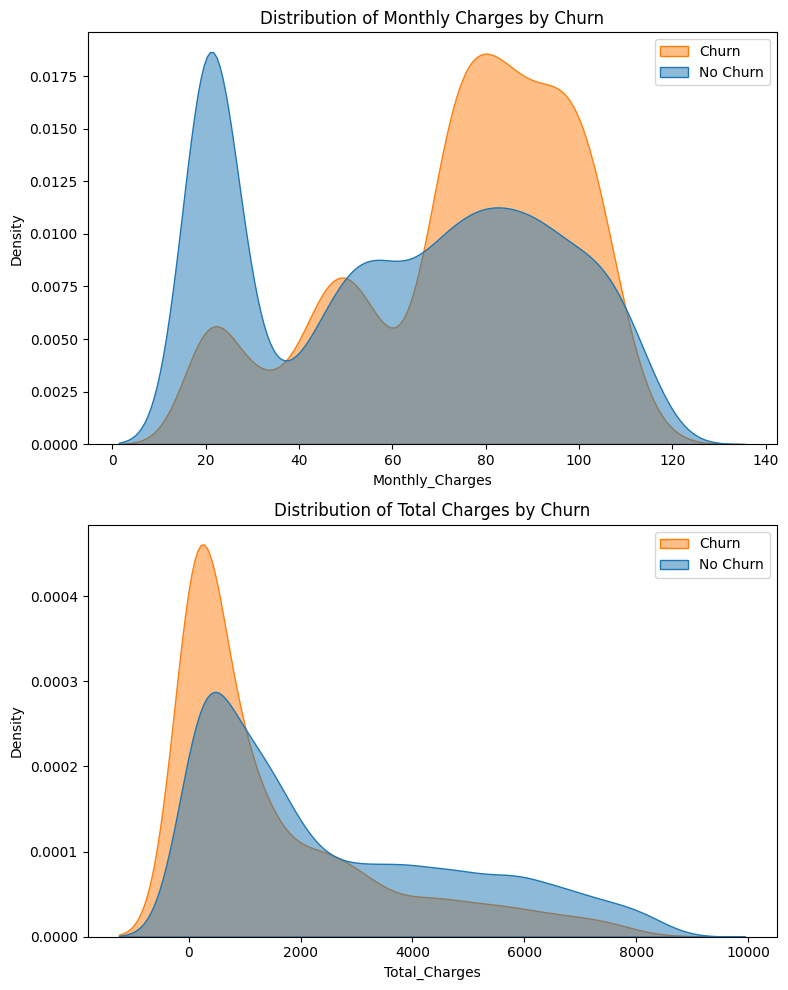

In [25]:
numerical_cols = ['Monthly_Charges', 'Total_Charges']
titles = ['Distribution of Monthly Charges by Churn', 'Distribution of Total Charges by Churn']

fig, axes = plt.subplots(2, 1, figsize=(8, 10))

for ax, col, title in zip(axes, numerical_cols, titles):
    sns.kdeplot(
        data=df1,
        x=col,
        hue='Churn',
        fill=True,
        common_norm=False,
        alpha=0.5,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel(col)
    ax.set_ylabel('Density')
    ax.legend(["Churn", "No Churn"], loc="upper right")

plt.tight_layout()
plt.show()

# Insights:
Higher monthly charges are strongly associated with increased churn, whereas customers with lower monthly charges tend to remain longer. This indicates that pricing sensitivity plays a significant role in customer retention.


Customers with lower total charges are more likely to churn, while those with higher total charges tend to remain longer, suggesting that total charges play a key role in customer retention.

In [26]:
df1.head(5)

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Tenure_Group
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


# Encode categorical colums

In [27]:
df2=df1.copy()

Encode binary columns as 0/1

In [28]:
binary_cols = ['Senior_Citizen', 'Partner', 'Dependents',
               'Phone_Service', 'Paperless_Billing', 'Churn']

# Map Yes/No to 1/0
df2[binary_cols] = (
    df2[binary_cols]
    .replace({'Yes': 1, 'No': 0})
    .astype(int)
)

/tmp/ipython-input-2734514469.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Yes': 1, 'No': 0})


One-hot encode multi-category columns

In [29]:
multi_cat_cols = ['Gender','Multiple_Lines', 'Internet_Service', 'Online_Security',
                  'Online_Backup', 'Device_Protection', 'Tech_Support',
                  'Streaming_TV', 'Streaming_Movies', 'Contract', 'Payment_Method', 'Tenure_Group']

df2 = pd.get_dummies(df2, columns=multi_cat_cols, drop_first=True)

In [30]:
df2.head()

,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,Churn,Gender_Male,...,Contract_One year,Contract_Two year,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Tenure_Group_13-24,Tenure_Group_25-36,Tenure_Group_37-48,Tenure_Group_49-60,Tenure_Group_61-72
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,False,False,True,False,False,False,False,False,False
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,True,False,False,False,True,False,True,False,False,False
2,0,0,0,2,1,1,53.85,108.15,1,True,...,False,False,False,False,True,False,False,False,False,False
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,True,False,False,False,False,False,False,True,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,True,False,False,False,False,False,False


In [31]:

print(df2.dtypes)  # should show all numeric types (int64, float64)

Senior_Citizen                              int64
Partner                                     int64
Dependents                                  int64
Tenure                                      int64
Phone_Service                               int64
Paperless_Billing                           int64
Monthly_Charges                           float64
Total_Charges                             float64
Churn                                       int64
Gender_Male                                  bool
Multiple_Lines_No phone service              bool
Multiple_Lines_Yes                           bool
Internet_Service_Fiber optic                 bool
Internet_Service_No                          bool
Online_Security_No internet service          bool
Online_Security_Yes                          bool
Online_Backup_No internet service            bool
Online_Backup_Yes                            bool
Device_Protection_No internet service        bool
Device_Protection_Yes                        bool


In [32]:
df2 = df2.astype({col: int for col in df2.select_dtypes(bool).columns})

In [33]:
df2.head()

,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,Churn,Gender_Male,...,Contract_One year,Contract_Two year,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Tenure_Group_13-24,Tenure_Group_25-36,Tenure_Group_37-48,Tenure_Group_49-60,Tenure_Group_61-72
0,0,1,0,1,0,1,29.85,29.85,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,34,1,0,56.95,1889.50,0,1,...,1,0,0,0,1,0,1,0,0,0
2,0,0,0,2,1,1,53.85,108.15,1,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,45,0,0,42.30,1840.75,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,2,1,1,70.70,151.65,1,0,...,0,0,0,1,0,0,0,0,0,0


In [34]:
df2.shape

(7010, 36)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Senior_Citizen                          7010 non-null   int64  
 1   Partner                                 7010 non-null   int64  
 2   Dependents                              7010 non-null   int64  
 3   Tenure                                  7010 non-null   int64  
 4   Phone_Service                           7010 non-null   int64  
 5   Paperless_Billing                       7010 non-null   int64  
 6   Monthly_Charges                         7010 non-null   float64
 7   Total_Charges                           7010 non-null   float64
 8   Churn                                   7010 non-null   int64  
 9   Gender_Male                             7010 non-null   int64  
 10  Multiple_Lines_No phone service         7010 non-null   int64  
 

# Correlation Matrix and Heatmap

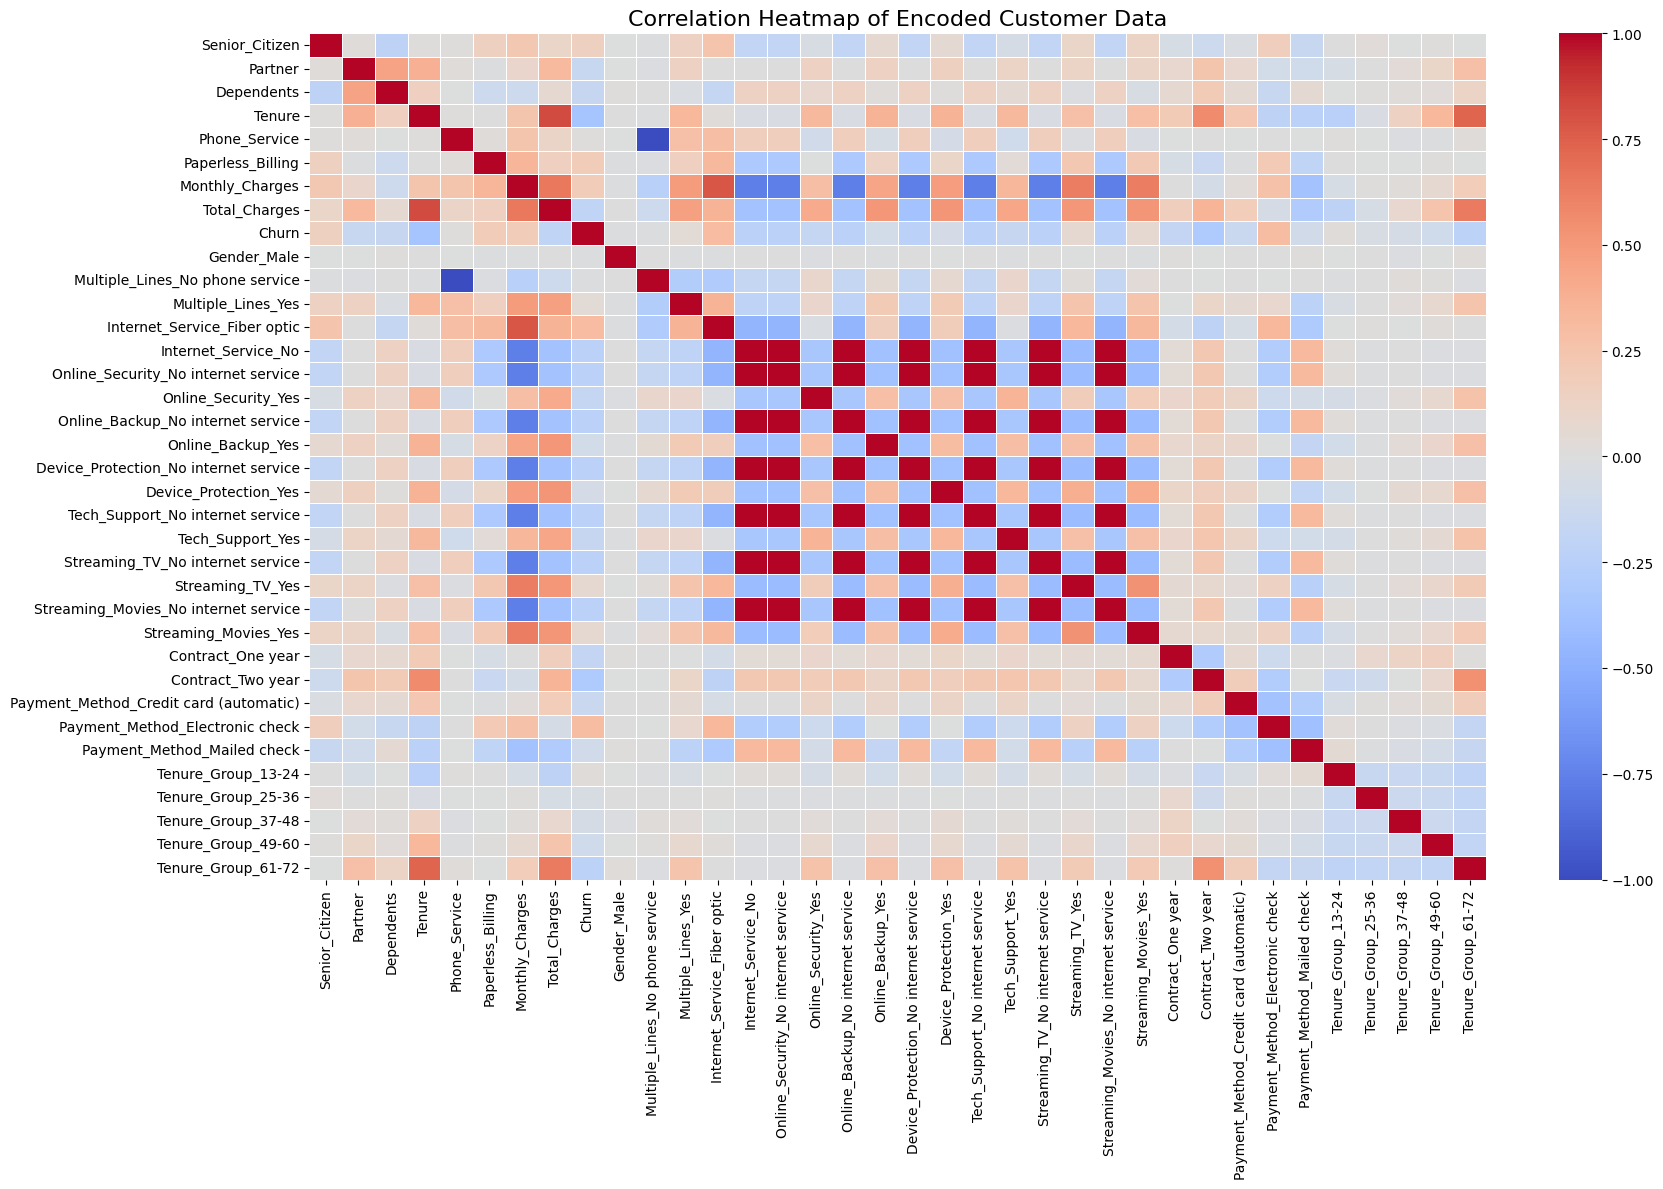

In [36]:
# Compute the correlation matrix
corr_matrix = df2.corr()

# Set up the figure
plt.figure(figsize=(18, 12))

# Draw the heatmap
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',      # color palette (blue→red)
    center=0,             # center the colormap at 0
    annot=False,          # set True if you want correlation values displayed
    fmt=".2f",
    linewidths=0.5
)

plt.title('Correlation Heatmap of Encoded Customer Data', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Brief Insights from the correlation matrix and heatmap

**Churn Drivers**

Negative correlation with Tenure (-0.35) → Longer-tenure customers are less likely to churn.

Positive correlation with Payment_Method_Electronic check (0.30) → Customers paying via electronic check are more likely to churn.

Negative correlation with Contract_Two year (-0.30) → Long-term contracts significantly reduce churn.

Positive correlation with Internet_Service_Fiber optic (0.31) → Fiber customers tend to churn more often, likely due to higher prices or service issues.

Negative correlation with Online_Security_Yes (-0.17) and Tech_Support_Yes (-0.16) → Having security and support services is linked to lower churn.

**Billing and Charges**

Monthly_Charges and Total_Charges are strongly correlated (0.65).

Higher Monthly_Charges show moderate positive correlation with Churn (0.19) — higher bills may push customers away.

**Customer Profile**

Senior_Citizen shows a small positive correlation with Churn (0.15) — older customers churn slightly more.

Partner and Dependents both negatively correlate with Churn (-0.15 to -0.16) — customers with family ties are more stable.

Internal Consistency Checks

Strong correlations among tenure-related groups and contract types confirm expected data structure consistency.

# Final Insights from the EDA analysis
**1. Demographics and Relationships**

Gender demonstrates minimal impact on customer churn, with only a marginally higher attrition rate observed among female customers.

Customers without partners or dependents show a greater propensity to discontinue services, suggesting that household stability and shared service usage may contribute to customer retention.

**2. Service Type and Add-on Features**

Customers utilizing fiber optic internet services exhibit notably higher churn rates compared to those on DSL or without internet services, potentially indicating pricing sensitivity or performance dissatisfaction.

The absence of supplementary services—including Online Security, Online Backup, Device Protection, and Technical Support—is strongly correlated with increased churn, underscoring the importance of value-added services in enhancing customer loyalty.

**3. Contract and Payment Behavior**

Month-to-month contract holders represent the segment with the highest churn rate, whereas customers on annual or biennial contracts demonstrate significantly higher retention levels. This highlights the stabilizing effect of long-term contractual commitments.

Customers opting for electronic check payments exhibit a disproportionately high churn rate compared to those using automatic bank transfers or credit card payments, suggesting that ease and convenience in payment methods may influence customer satisfaction.

**4. Financial Factors**

Higher monthly charges are positively correlated with churn, indicating that elevated pricing structures may drive customers to discontinue services.

Conversely, customers with higher total charges—representing long-term and higher-value subscribers—display greater loyalty, implying that sustained engagement and perceived value contribute to long-term retention.

# Recommendations

Based on the exploratory and predictive analyses, the following strategic actions are recommended to reduce customer churn and strengthen customer loyalty:

**Enhance Retention Among Short-Term Customers**

Introduce onboarding and engagement programs targeted at new customers (1–12 months tenure), such as welcome offers, loyalty points, or proactive support, to reduce early-stage churn.

**Reassess Fiber Optic Pricing and Service Quality**

Conduct a pricing and performance review of fiber optic plans to address potential dissatisfaction driving higher churn in this segment.

**Promote Add-on Services and Bundled Offers**

Encourage subscriptions to Online Security, Backup, Device Protection, and Tech Support by offering bundled discounts or promotional packages, as these features are linked to stronger retention.

**Incentivize Long-Term Contracts**

Offer exclusive benefits (e.g., discounted rates, free upgrades, or loyalty rewards) for customers who commit to one- or two-year contracts, reducing month-to-month attrition.

**Improve Payment Experience and Convenience**

Encourage adoption of automated payment methods through small discounts or incentives to reduce churn associated with electronic check users and enhance payment convenience.

**Monitor High-Charge Customers for Risk Signals**

While high monthly charges can indicate revenue potential, they may also signal dissatisfaction risk; implementing targeted satisfaction surveys or personalized offers for this group could preempt churn.

## Prodictive Models

These tree-based Models: Random Forest, XGBoost and Decision Tree will be utilised to build the predictive model.

Importing the libraries

In [37]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

In [38]:
df_new = df2.copy()

In [ ]:
df_new.head()

,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,Churn,Gender_Male,...,Contract_One year,Contract_Two year,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Tenure_Group_13-24,Tenure_Group_25-36,Tenure_Group_37-48,Tenure_Group_49-60,Tenure_Group_61-72
0,0,1,0,1,0,1,29.85,29.85,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,34,1,0,56.95,1889.50,0,1,...,1,0,0,0,1,0,1,0,0,0
2,0,0,0,2,1,1,53.85,108.15,1,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,45,0,0,42.30,1840.75,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,2,1,1,70.70,151.65,1,0,...,0,0,0,1,0,0,0,0,0,0


In [39]:
# Select features and target
X = df_new.drop(['Churn'], axis=1)
y = df_new['Churn']

In [40]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [41]:
print( "Length of dataset: " , len(X))
print( "Length of train dataset: " , len(X_train))
print( "Length of test dataset: " , len(X_test))

Length of dataset:  7010
Length of train dataset:  5608
Length of test dataset:  1402


In [42]:
# Standardize numerical features
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Decision Tree Classifier – Training, Evaluation & Visualization

=== Decision Tree Performance ===
Accuracy : 0.734
Precision: 0.497
Recall   : 0.496
F1-Score : 0.497

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1031
           1       0.50      0.50      0.50       371

    accuracy                           0.73      1402
   macro avg       0.66      0.66      0.66      1402
weighted avg       0.73      0.73      0.73      1402



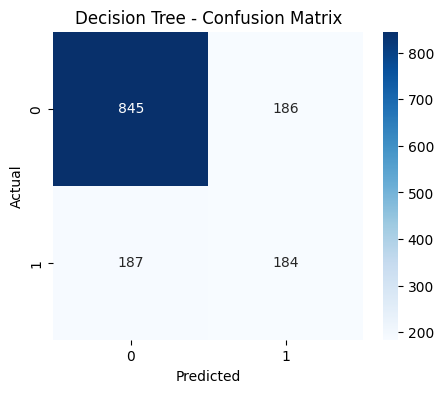

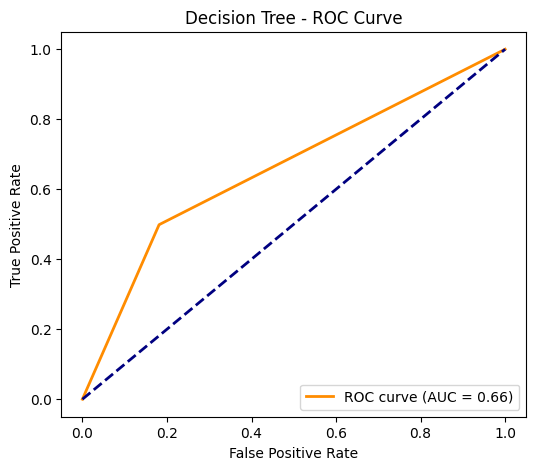

In [43]:
#  Train the Model
# ==========================================================
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_sc, y_train)

# Predict
y_pred = dt_model.predict(X_test_sc)
y_proba = dt_model.predict_proba(X_test_sc)[:, 1]

# ==========================================================
#  Evaluate Model Performance
# ==========================================================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== Decision Tree Performance ===")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1-Score : {f1:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ==========================================================
#  Confusion Matrix
# ==========================================================
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==========================================================
#  ROC Curve
# ==========================================================
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Random Forest Classifier – Training, Evaluation & Visualization

=== Random Forest Performance ===
Accuracy: 0.7917
Precision: 0.6479
Recall: 0.4663
F1 Score: 0.5423


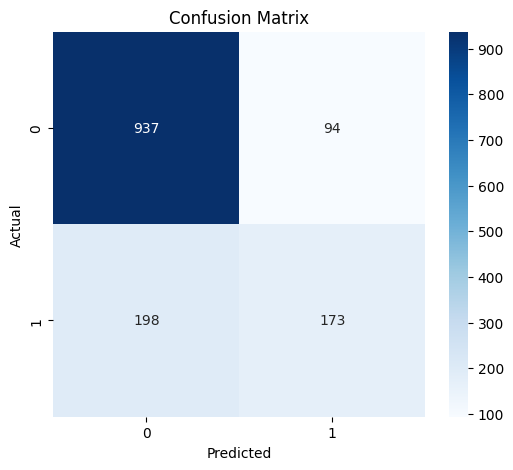

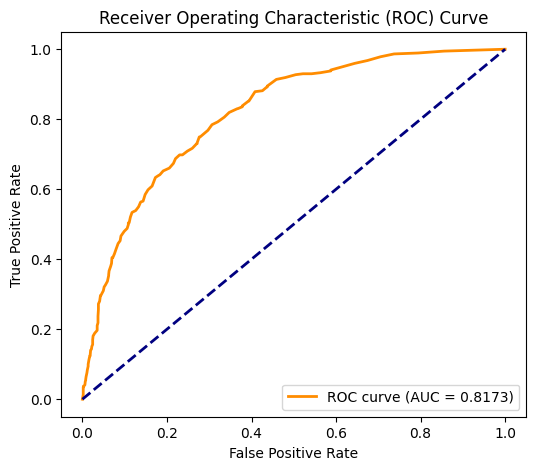

In [44]:

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_sc, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_sc)
y_prob = rf_model.predict_proba(X_test_sc)[:, 1]  # For ROC curve

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== Random Forest Performance ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


XGBoost Classifier – Training, Evaluation & Visualization

=== XGBoost Model Performance ===
Accuracy: 0.8017
Precision: 0.6620
Recall: 0.5121
F1 Score: 0.5775


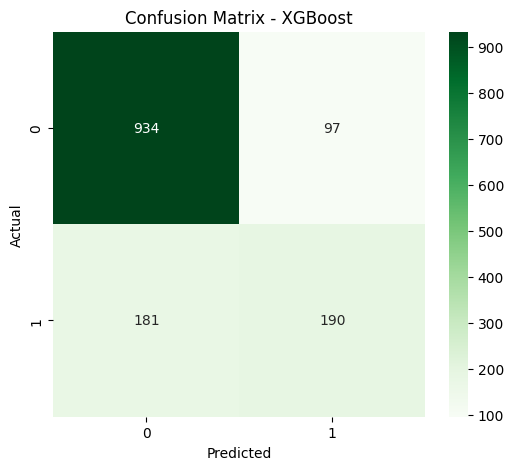

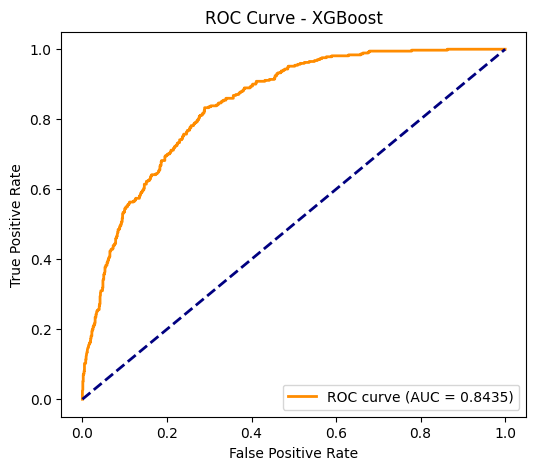

In [45]:


# Initialize and train XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train_sc, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_sc)
y_prob = xgb_model.predict_proba(X_test_sc)[:, 1]  # probability for ROC curve

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== XGBoost Model Performance ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()




## Model Performance Comparison

| Model         | Accuracy | Precision | Recall | F1 Score |
| ------------- | -------- | --------- | ------ | -------- |
| Decision Tree | 0.734    | 0.497     | 0.496  | 0.497    |
| Random Forest | 0.792    | 0.648     | 0.466  | 0.542    |
| XGBoost       | 0.802    | 0.662     | 0.512  | 0.578    |


**Analysis:**

XGBoost achieves the best overall performance, with the highest accuracy (0.802), precision (0.662), and F1 score (0.578), making it the most effective model for predicting customer churn.

Random Forest shows improved performance compared to the Decision Tree, particularly in accuracy and F1 score, but its recall is slightly lower, indicating it misses some churned customers.

Decision Tree performs the weakest across all metrics, suggesting it is less reliable for identifying customers at risk of churn.

**Conclusion:**

XGBoost provides the best trade-off between identifying churned customers and minimizing false positives, making it the most suitable model for deploying in a customer retention strategy.